# Kmeans by your coding

###K-Means Clustering

 - Step1 - 각 데이터에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집 할당
 - Step2 - 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들 좌표의 평균(mean)을 계산
 - Step3 - 각 클러스터의 할당이 바뀌지 않을 때까지 반복

In [1]:
from google.colab import drive
drive.mount('/content/drive')

basicpath = '/content/drive/MyDrive/CBNUDatascience_colab/9주차'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os

## Data import 및 확인

In [3]:
path = os.path.join(basicpath, 'Dataset/Clustering')
file = 'input2.csv'
data = pd.read_csv(os.path.join(path, file), index_col=None)

In [4]:
data.head(10)

,x,y
0,40.169678,7.529327
1,15.040789,19.121220
2,12.907942,27.272168
3,44.258823,11.844700
4,32.404005,37.238491
5,11.591989,30.907491
6,29.806420,51.450404
7,30.487456,46.869026
8,19.039982,14.783329
9,10.634248,11.455458


## Data scatter plot으로 확인

In [5]:
x = data['x']
y = data['y']

In [6]:
import matplotlib.pyplot as plt

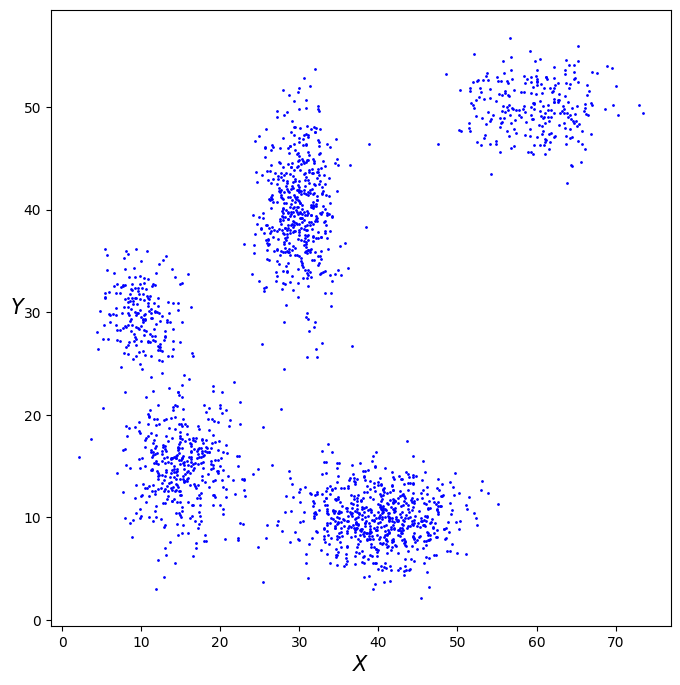

In [7]:
plt.figure(figsize=[8, 8])
plt.scatter(x, y, s=1, c='b')
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15, rotation=0)
plt.show()

## 과제1. Kmeans 알고리즘 구현
다음 코드의 빈칸을 완성하여 Kmeans 알고리즘을 완성하시오.

In [8]:
def distance(a, b):
    """
    a는 (m, ), b는 (n, m)의 numpy array.
    b의 각 row와 a의 L2 distance를 계산하여 결과를 반환.

    Parameters
    ----------
    a: np.array, shape = (m, )
        하나의 data point가 저장
    b: np.array, shape = (n, m)
        각 row에 하나의 data point가 저장 (m개의 data point)

    Returns
    ----------
    np.array, shape=(n, )
        a의 각 row와 b의 L2 distance를 계산하여
        (n, )의 형태로 저장하여 반환
        (각 값이 L2_distance(a, b[i])를 나타냄)
    """
# a = np.array([1, 0])
# b = np.array([[5, 0], [2, 1]])

    #답변 1

    distances = np.linalg.norm(b - a, axis=1)

    return distances

In [9]:
# Distance function 예시

a = np.array([1, 0])
b = np.array([[5, 0], [2, 1], [4, 2]])

distance(a, b)

array([4.        , 1.41421356, 3.60555128])

In [47]:
# Step1 - 각 데이터에 대해 가장 가까운 중심점을 찾고, 그 중심점에 해당하는 군집 할당
def _assign_labels(X, centers):
    """ X의 각 data point를 각각의 cluster에 assign
    각각의 cluster center와 거리를 측정하여 가까운 cluster에 assign

    Parameters
    ----------
    X: np.array
        my_kmeans함수의 input data의 data값 (data.values)

    centers:
        np.array
        각각의 cluster center좌표롤 array로 표현
        cluster의 개수가 k이고, 좌표를 d차원으로 표기할때
        (k, d)의 shape을 가짐

    Return
    ----------
    np.array
        input X가 m개의 data point를 가질 때,
        (m,)의 shape을 가지는 1d array
        X의 특정 data point의 index를 d_index라 할 때,
        return array[d_index]에는 assign된 cluster number를 저장
        cluster number는 range(0, k, step=1)로 표현
    """
    # 각 데이터 포인트를 가장 가까운 클러스터 중심점으로 할당해주는 함수

    #답변 2
    labels = np.zeros(X.shape[0])
    for i, p in enumerate(X):
        dist_from_center = np.linalg.norm(p - centers, axis=1)
        labels[i] = np.argmin(dist_from_center)

    return labels

In [48]:
# Step2 - 할당된 군집을 기반으로 새로운 중심 계산, 중심점은 군집 내부 점들 좌표의 평균(mean)을 계산
def _update_centers(X, labels, k):
    """ Cluster center를 update
    K-means algorithm에 따라, 한 cluster에 assign된 data points에 대해
    그 mean point를 구하여 반환

    Parameters
    ----------
    X: np.array
        my_kmeans함수의 input data의 data값 (data.values)

    labels: np.array
        _assign_labels의 return값으로
        X의 datapoints를 cluter에 assign한 결과 array

    k: integer
        K means의 cluster 개수인 k값을 지정
    """
    # 새로운 중심점을 업데이트 하기 위한 함수

    #답변 3

    new_centers = np.zeros([k, 2])
    for i in range(k):
      mask = (labels == i)
      new_centers[i] = X[mask].mean(axis=0)

    return new_centers    # 업데이트된 새로운 중심점

In [49]:
def my_kmeans(data, k):
    """ 메인 k-means 알고리즘
    data의 points중 k개의 임의의 point를 select하여 cluster center로 삼음
    while:
        data의 각 points에서 각각의 cluster에 대한 거리를 계산하여 가까운 cluster에 assign
        형성된 cluster의 mean point를 계산하여 새로운 cluster center로 만듦
        소속된 cluster가 바뀌는 data가 없으면 break

    Parameters
    ----------
    data: pd.DataFrame
        row: data point
        column: x좌표, y좌표

    k: integer
        k-means의 cluster 개수인 k값을 지정

    Return
    ----------
    np.array
        1 dimension array로 각 data point가 어떤 cluster에 속하는지 표현
        Input data의 특정 data point에 대한 index를 d_index라 할 때,
        return_array[d_index]는 해당 data point의 cluster number를 의미
        cluster number는 range(0, k, step=1)로 표현
    """

    #답변 4
    X = data.values

    # 4.1 Random으로 선택한 data points를 cluster center화
        # np.random.choice() 활용
    arr_idx = np.arange(X.shape[0])
    init_center_idx = np.random.choice(arr_idx, k, replace = False)
    centers = X[init_center_idx]

    # 4.2 각 cluster에 data points assign
    labels = _assign_labels(X, centers)

    # 4.3 Main algorithm - update center, assign
    old_labels = None

    while np.any(old_labels != labels):
      old_labels = labels
      new_centers = _update_centers(X, labels, k)
      labels = _assign_labels(X, new_centers)

    return labels

In [58]:
labels = my_kmeans(data, 5)

In [59]:
labels

array([0., 4., 1., ..., 2., 3., 3.])

## Clustering 결과 확인

In [60]:
unique_labels = np.unique(labels)
colors = [plt.cm.gist_rainbow(each)
        for each in np.linspace(0, 1, len(unique_labels))]

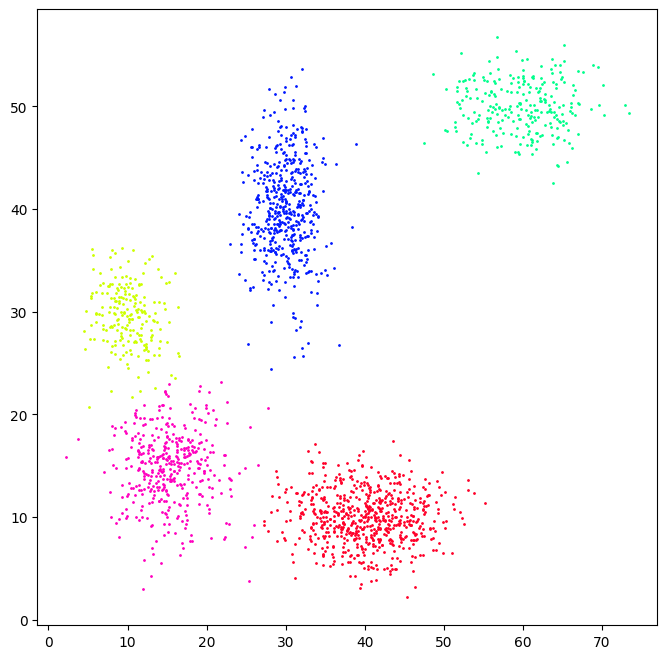

In [61]:
plt.figure(figsize=[8, 8])
for cluster_index, col in zip(unique_labels, colors):
    class_mask = (labels == cluster_index)
    plt.plot(data.values[class_mask][:, 0],
             data.values[class_mask][:, 1],
            'o', markerfacecolor=tuple(col), markeredgecolor=tuple(col),
            markersize=1)